In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, SimpleRNN, Dropout, Lambda, LSTM, GRU, Bidirectional, Layer, Attention, Conv1D, Flatten, GlobalMaxPooling1D
from keras_self_attention import SeqSelfAttention
from sklearn.preprocessing import StandardScaler
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customers_in_a_Shop.csv', header=None)
df.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [3]:
df.columns={"Date","Customers"}
print(df.isnull().sum())

Date         0
Customers    4
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m")
df = df.set_index('Date')
df

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,720.0


In [5]:
missing = df[df.isna().any(axis=1)]
print(missing)

            Customers
Date                 
1951-06-01        NaN
1951-07-01        NaN
1954-06-01        NaN
1960-03-01        NaN


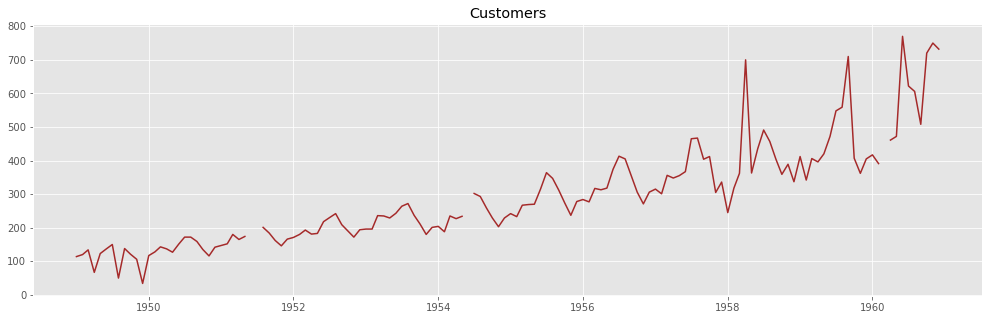

In [6]:
#from matplotlib import style
#print(plt.style.available)

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(17,5)

plt.plot(df, color='brown')
plt.title("Customers")
plt.show()

## Imputing missing values

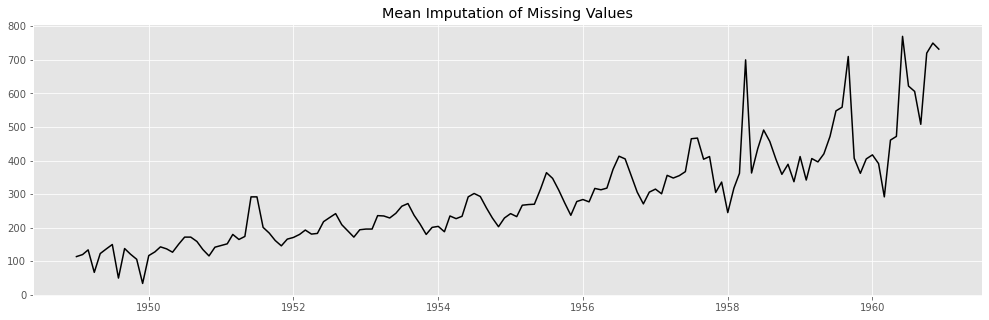

In [7]:
## Comparing several types of interpolations - mean 
plt.rcParams['figure.figsize']=(17,5)
df['Customers_mean'] = df['Customers'].fillna(df['Customers'].mean())
plt.plot(df['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

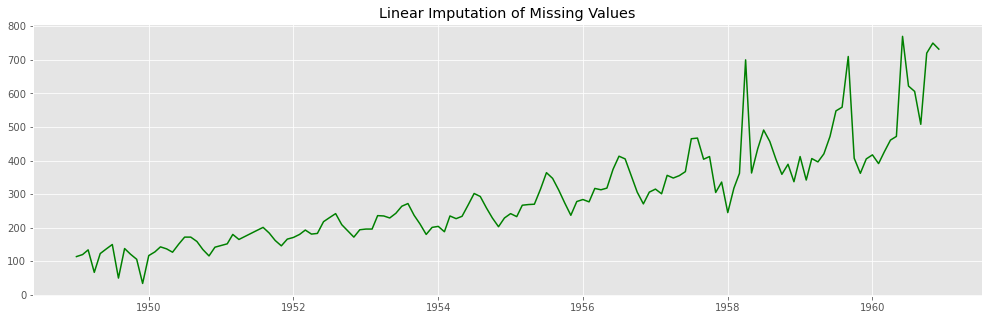

In [8]:
## Comparing several types of interpolations - linear
plt.rcParams['figure.figsize']=(17,5)
df['Customers_linear'] = df['Customers'].interpolate(method='linear')
plt.plot(df['Customers_linear'],color='green')
plt.title("Linear Imputation of Missing Values")
plt.show()

In [9]:
df1 = df['1949-06':'1960-06':12]
df1

,Customers,Customers_mean,Customers_linear
Date,,,
1949-06-01,137.0,137.000000,137.0
1950-06-01,151.0,151.000000,151.0
1951-06-01,NaN,291.878571,183.0
1952-06-01,218.0,218.000000,218.0
1953-06-01,243.0,243.000000,243.0
1954-06-01,NaN,291.878571,268.0
1955-06-01,315.0,315.000000,315.0
1956-06-01,374.0,374.000000,374.0
1957-06-01,367.0,367.000000,367.0


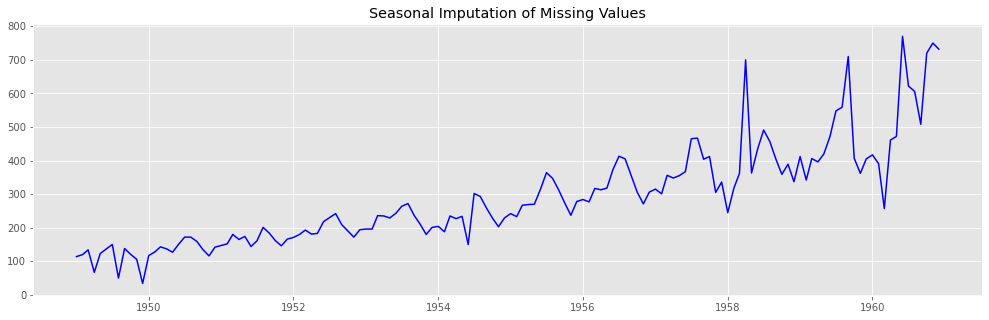

In [10]:
## Comparing several types of interpolations - seasonal interpolation
df.loc['1960-03'].fillna((df['1949-03':'1959-03':12].sum())/df['1949-03':'1959-03':12].shape[0], inplace=True)
df.loc['1954-06'].fillna((df['1949-06':'1953-06':12].sum())/(df['1949-06':'1953-06':12].shape[0]), inplace=True)
df.loc['1951-07'].fillna((df['1949-07':'1950-07':12].sum())/(df.loc['1949-07':'1950-07':12].shape[0]), inplace=True)
df.loc['1951-06'].fillna((df['1949-06':'1950-06':12].sum())/(df['1949-06':'1950-06':12].shape[0]), inplace=True)

plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['Customers'],color='blue')
plt.title("Seasonal Imputation of Missing Values")
plt.show()

In [11]:
df['Customers'].sort_values(ascending=False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers, dtype: float64

## Normality plots 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customers', ylabel='Density'>

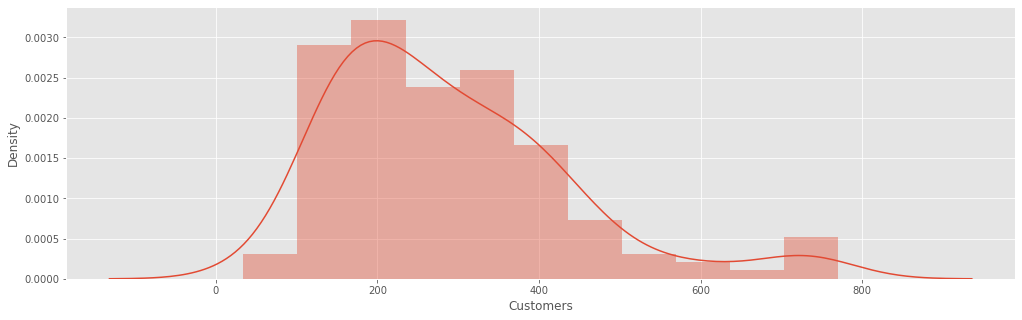

In [12]:
sns.distplot(df['Customers'])

((array([-2.58977345, -2.26833208, -2.08397164, -1.95134078, -1.84615093,
         -1.75813779, -1.68195358, -1.61444188, -1.55357684, -1.49797725,
         -1.44665728, -1.39888755, -1.35411252, -1.31189888, -1.27190175,
         -1.23384196, -1.19749012, -1.16265539, -1.12917712, -1.09691879,
         -1.06576327, -1.03560932, -1.00636876, -0.97796428, -0.95032771,
         -0.92339857, -0.89712296, -0.87145259, -0.84634402, -0.82175802,
         -0.797659  , -0.77401457, -0.75079515, -0.72797364, -0.70552513,
         -0.68342667, -0.66165704, -0.64019656, -0.61902697, -0.59813124,
         -0.57749349, -0.55709882, -0.53693331, -0.51698381, -0.49723799,
         -0.47768418, -0.45831134, -0.43910901, -0.42006725, -0.40117661,
         -0.38242807, -0.36381301, -0.34532319, -0.32695068, -0.30868788,
         -0.29052747, -0.27246238, -0.25448578, -0.23659106, -0.21877178,
         -0.2010217 , -0.18333474, -0.16570495, -0.14812651, -0.13059373,
         -0.11310101, -0.09564283, -0.

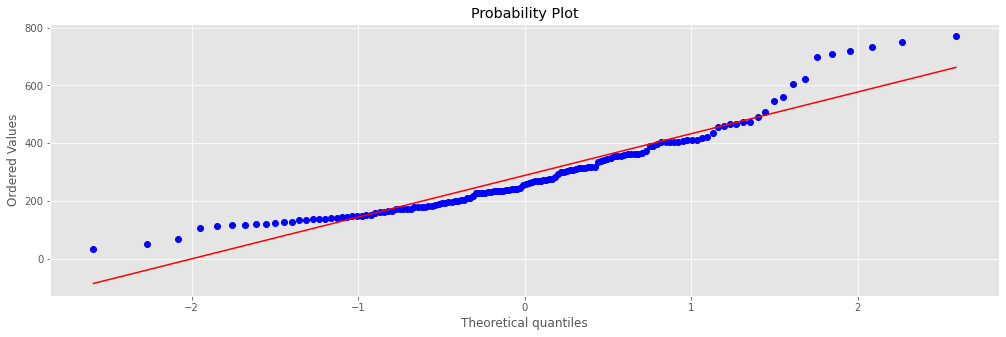

In [13]:
import scipy.stats
import pylab 
scipy.stats.probplot(df['Customers'],plot=pylab)
# pylab.show()

# Y-Axis: Data Value
# X-Axis: 

# Naive Decomposition
### Additive Seasonal Decomposition

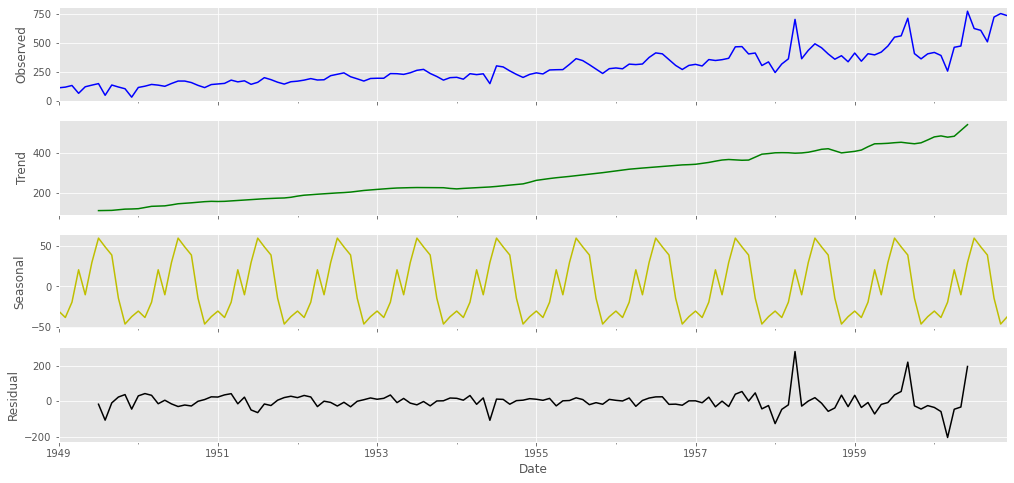

In [14]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='additive')
#decomposition.plot()

fig, axes = plt.subplots(4, 1, sharex=True)

decomposition.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='y')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')                           
plt.show()

### Multiplicative Seasonal Decomposition

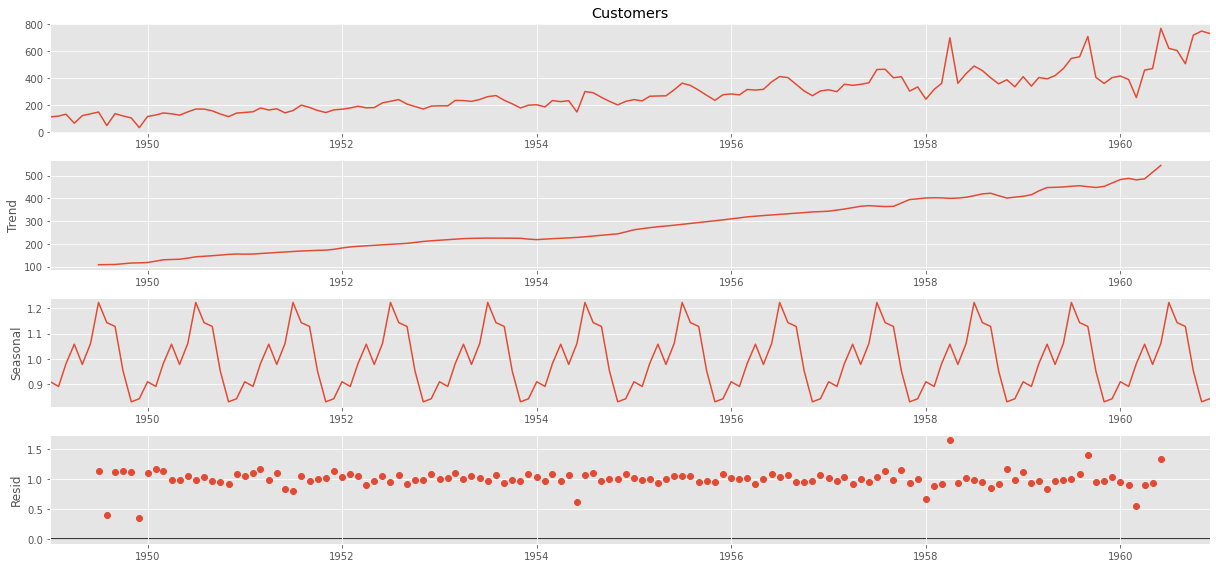

In [15]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [16]:
length = int(np.round(len(df["Customers_linear"])*0.8))
print(length)

115


In [17]:
df.drop(columns=["Customers_mean","Customers_linear"], inplace=True)
df.index.freq = 'MS'

In [18]:
## iF removing of the index is needed.
#df.reset_index(drop=True, inplace=True)
#df

In [19]:
train = df.iloc[:length,:]
train

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1958-03-01,362.0
1958-04-01,700.0
1958-05-01,363.0


In [20]:
test = df.iloc[length:,: ]
test

,Customers
Date,
1958-08-01,457.000000
1958-09-01,404.000000
1958-10-01,359.000000
1958-11-01,389.000000
1958-12-01,337.000000
1959-01-01,412.000000
1959-02-01,342.000000
1959-03-01,406.000000
1959-04-01,396.000000


In [21]:
print(test.shape)
print(train.shape)

(29, 1)
(115, 1)


In [22]:
SC = StandardScaler()
train = SC.fit_transform(train)
test = SC.transform(test)
train

array([[-1.21245702],
       [-1.15425422],
       [-1.0184477 ],
       [-1.66837891],
       [-1.12515282],
       [-0.9893463 ],
       [-0.86324024],
       [-1.83328683],
       [-0.97964583],
       [-1.14455375],
       [-1.29006074],
       [-1.98849429],
       [-1.18335562],
       [-1.07665049],
       [-0.9311435 ],
       [-0.9893463 ],
       [-1.08635096],
       [-0.85353978],
       [-0.64982999],
       [-0.64982999],
       [-0.77593605],
       [-1.00874723],
       [-1.19305608],
       [-0.94084397],
       [-0.89234164],
       [-0.84383931],
       [-0.57222627],
       [-0.71773325],
       [-0.63042906],
       [-0.92144304],
       [-0.75653512],
       [-0.36851648],
       [-0.5334244 ],
       [-0.74683465],
       [-0.90204211],
       [-0.70803279],
       [-0.65953046],
       [-0.57222627],
       [-0.44612021],
       [-0.5625258 ],
       [-0.54312487],
       [-0.20360856],
       [-0.08720297],
       [ 0.02920262],
       [-0.29091276],
       [-0

## RNN with Convolution

### Change Data to RNN Architecture

In [23]:
stepsize = 18 #Should be optimized!

def RNN_Structure(df, stepsize):
    X =[]
    Y =[]
    
    for n in range(len(df) - stepsize):
        z = n + stepsize
        X.append(df[n:z,]) #sample =10
        Y.append(df[z,])   #sample = 11 is your label
        
    return np.array(X) , np.array(Y)

        
X_train ,Y_train =  RNN_Structure(train, stepsize)
X_test  , Y_test =  RNN_Structure(test, stepsize)

In [24]:
print(X_train.shape) # X_train value with step = 10
print(X_test.shape)  # X_Test value with step = 10
print(Y_train.shape) # X_train value with step = 10
print(Y_test.shape)  # X_Test value with step = 10

(97, 18, 1)
(11, 18, 1)
(97, 1)
(11, 1)


* First Argument: Sample size
* Second Argument: Time Step
* Third Argument: Number of Feature

**(Sample size, Step Lenght/Sequence Lenght, Number of Input Feature/ Input Value to RNN)**

In [25]:
## Not necessary for this series, since already done in the previous definition function. But in case:

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_train.shape)
# print(X_test.shape)

In [26]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

### Simple RNN

In [48]:
model = Sequential()
model.add(SimpleRNN(units=512, return_sequences=True, activation ="LeakyReLU"))
#model.add(SeqSelfAttention(attention_activation='sigmoid')) 
model.add(Conv1D(filters=256, kernel_size=2, strides=1, activation="LeakyReLU"))
#model.add(GlobalMaxPooling1D()) # Not recommended, this will significantly drop the performance.
model.add(Flatten())
model.add(Dense(32, activation="LeakyReLU"))
model.add(Dense(1, activation="LeakyReLU"))
model.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")

In [49]:
memory = model.fit(X_train, Y_train , epochs = 500, batch_size = 100, verbose = 1)

Epoch 1/500
1/1 [==============================] - 1s 940ms/step - loss: 0.7221 - logcosh: 0.3220
Epoch 2/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4089 - logcosh: 0.1270
Epoch 3/500
1/1 [==============================] - 0s 79ms/step - loss: 0.6562 - logcosh: 0.3224
Epoch 4/500
1/1 [==============================] - 0s 78ms/step - loss: 0.3652 - logcosh: 0.1188
Epoch 5/500
1/1 [==============================] - 0s 78ms/step - loss: 0.4541 - logcosh: 0.1633
Epoch 6/500
1/1 [==============================] - 0s 73ms/step - loss: 0.3816 - logcosh: 0.1275
Epoch 7/500
1/1 [==============================] - 0s 76ms/step - loss: 0.3083 - logcosh: 0.0902
Epoch 8/500
1/1 [==============================] - 0s 74ms/step - loss: 0.3327 - logcosh: 0.0984
Epoch 9/500
1/1 [==============================] - 0s 77ms/step - loss: 0.3241 - logcosh: 0.0932
Epoch 10/500
1/1 [==============================] - 0s 76ms/step - loss: 0.3000 - logcosh: 0.0802
Epoch 11/500
1/1 [==========

1/1 [==============================] - 0s 70ms/step - loss: 0.1004 - logcosh: 0.0240
Epoch 85/500
1/1 [==============================] - 0s 68ms/step - loss: 0.1277 - logcosh: 0.0249
Epoch 86/500
1/1 [==============================] - 0s 69ms/step - loss: 0.1320 - logcosh: 0.0256
Epoch 87/500
1/1 [==============================] - 0s 67ms/step - loss: 0.1063 - logcosh: 0.0224
Epoch 88/500
1/1 [==============================] - 0s 64ms/step - loss: 0.1134 - logcosh: 0.0244
Epoch 89/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0989 - logcosh: 0.0218
Epoch 90/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1087 - logcosh: 0.0209
Epoch 91/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1052 - logcosh: 0.0198
Epoch 92/500
1/1 [==============================] - 0s 71ms/step - loss: 0.1056 - logcosh: 0.0205
Epoch 93/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0883 - logcosh: 0.0182
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 67ms/step - loss: 0.0379 - logcosh: 0.0042
Epoch 168/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0432 - logcosh: 0.0044
Epoch 169/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0410 - logcosh: 0.0043
Epoch 170/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0450 - logcosh: 0.0043
Epoch 171/500
1/1 [==============================] - 0s 67ms/step - loss: 0.0331 - logcosh: 0.0038
Epoch 172/500
1/1 [==============================] - 0s 77ms/step - loss: 0.0480 - logcosh: 0.0045
Epoch 173/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0486 - logcosh: 0.0046
Epoch 174/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0489 - logcosh: 0.0048
Epoch 175/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0527 - logcosh: 0.0048
Epoch 176/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0375 - logcosh: 0.0039
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 90ms/step - loss: 0.0374 - logcosh: 0.0038
Epoch 250/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0417 - logcosh: 0.0038
Epoch 251/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0339 - logcosh: 0.0034
Epoch 252/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0461 - logcosh: 0.0042
Epoch 253/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0293 - logcosh: 0.0033
Epoch 254/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0565 - logcosh: 0.0053
Epoch 255/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0470 - logcosh: 0.0046
Epoch 256/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0451 - logcosh: 0.0040
Epoch 257/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0408 - logcosh: 0.0040
Epoch 258/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0473 - logcosh: 0.0040
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 92ms/step - loss: 0.0289 - logcosh: 0.0031
Epoch 332/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0258 - logcosh: 0.0030
Epoch 333/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0285 - logcosh: 0.0030
Epoch 334/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0312 - logcosh: 0.0032
Epoch 335/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0261 - logcosh: 0.0030
Epoch 336/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0256 - logcosh: 0.0030
Epoch 337/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0244 - logcosh: 0.0030
Epoch 338/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0257 - logcosh: 0.0030
Epoch 339/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0339 - logcosh: 0.0036
Epoch 340/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0281 - logcosh: 0.0032
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 91ms/step - loss: 0.0271 - logcosh: 0.0028
Epoch 414/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0285 - logcosh: 0.0028
Epoch 415/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0278 - logcosh: 0.0028
Epoch 416/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0287 - logcosh: 0.0029
Epoch 417/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0271 - logcosh: 0.0027
Epoch 418/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0270 - logcosh: 0.0027
Epoch 419/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0237 - logcosh: 0.0026
Epoch 420/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0269 - logcosh: 0.0028
Epoch 421/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0245 - logcosh: 0.0028
Epoch 422/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0207 - logcosh: 0.0025
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 85ms/step - loss: 0.0249 - logcosh: 0.0022
Epoch 496/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0226 - logcosh: 0.0021
Epoch 497/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0248 - logcosh: 0.0021
Epoch 498/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0218 - logcosh: 0.0020
Epoch 499/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0206 - logcosh: 0.0020
Epoch 500/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0225 - logcosh: 0.0021


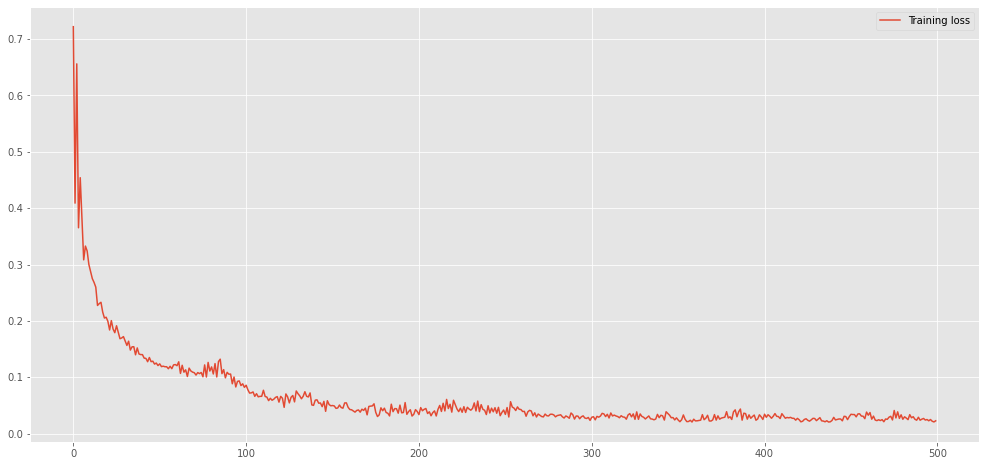

In [50]:
Loss_func = memory.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 18, 512)           263168    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 17, 256)           262400    
_________________________________________________________________
flatten_3 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                139296    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 664,897
Trainable params: 664,897
Non-trainable params: 0
_________________________________________________________________


In [52]:
score = model.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh

[0.024503229185938835, 0.002158615505322814]

In [53]:
#X_train = np.reshape(X_train, (-1,1))
#X_test = np.reshape(X_test, (-1,1))
print(X_train.shape)
print(X_test.shape)

(97, 18, 1)
(11, 18, 1)


In [54]:
pred_train = SC.inverse_transform(model.predict(X_train))
pred_test = SC.inverse_transform(model.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

In [55]:
pred

,0
0,169.666306
1,170.289764
2,155.655563
3,131.437302
4,113.380936
...,...
103,747.970032
104,636.720886
105,619.843384
106,543.681030


In [56]:
df.reset_index(inplace=True, drop=True)
df

,Customers
0,114.0
1,120.0
2,134.0
3,67.0
4,123.0
...,...
139,606.0
140,508.0
141,720.0
142,750.0


<function matplotlib.pyplot.show(close=None, block=None)>

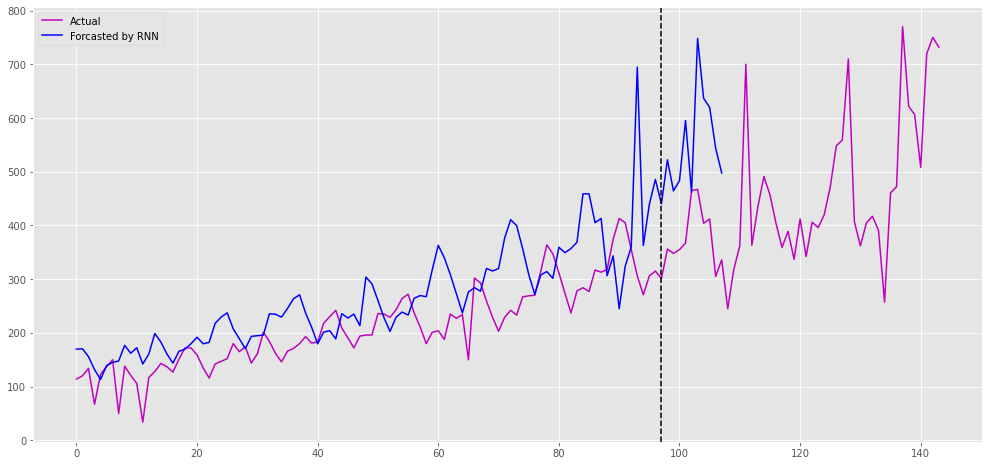

In [57]:
plt.plot(df, color="m")
plt.plot(pred, color="blue")
plt.legend(["Actual","Forcasted by RNN"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Long-Short Term Memory (LSTM)

In [68]:
lstm = Sequential()
lstm.add(LSTM(units=512, return_sequences=True, activation ="LeakyReLU"))
lstm.add(Conv1D(filters=256, kernel_size=2, strides=1, activation="LeakyReLU"))
lstm.add(Flatten())
lstm.add(Dense(32, activation="LeakyReLU"))
lstm.add(Dense(1, activation="LeakyReLU"))
lstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_lstm = lstm.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 2s 139ms/step - loss: 0.6596 - logcosh: 0.2819
Epoch 2/500
2/2 [==============================] - 0s 143ms/step - loss: 0.4028 - logcosh: 0.1294
Epoch 3/500
2/2 [==============================] - 0s 130ms/step - loss: 0.4106 - logcosh: 0.1424
Epoch 4/500
2/2 [==============================] - 0s 126ms/step - loss: 0.3628 - logcosh: 0.1187
Epoch 5/500
2/2 [==============================] - 0s 147ms/step - loss: 0.3387 - logcosh: 0.1073
Epoch 6/500
2/2 [==============================] - 0s 142ms/step - loss: 0.3074 - logcosh: 0.0860
Epoch 7/500
2/2 [==============================] - 0s 137ms/step - loss: 0.3351 - logcosh: 0.0935
Epoch 8/500
2/2 [==============================] - 0s 128ms/step - loss: 0.3047 - logcosh: 0.0838
Epoch 9/500
2/2 [==============================] - 0s 152ms/step - loss: 0.2924 - logcosh: 0.0864
Epoch 10/500
2/2 [==============================] - 0s 126ms/step - loss: 0.2904 - logcosh: 0.0852
Epoch 11/500
2/2 [=

2/2 [==============================] - 0s 157ms/step - loss: 0.1416 - logcosh: 0.0397
Epoch 84/500
2/2 [==============================] - 0s 169ms/step - loss: 0.1420 - logcosh: 0.0407
Epoch 85/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1451 - logcosh: 0.0414
Epoch 86/500
2/2 [==============================] - 0s 156ms/step - loss: 0.1432 - logcosh: 0.0415
Epoch 87/500
2/2 [==============================] - 0s 154ms/step - loss: 0.1337 - logcosh: 0.0395
Epoch 88/500
2/2 [==============================] - 0s 154ms/step - loss: 0.1330 - logcosh: 0.0402
Epoch 89/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1400 - logcosh: 0.0422
Epoch 90/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1361 - logcosh: 0.0416
Epoch 91/500
2/2 [==============================] - 0s 155ms/step - loss: 0.1381 - logcosh: 0.0409
Epoch 92/500
2/2 [==============================] - 0s 158ms/step - loss: 0.1280 - logcosh: 0.0392
Epoch 93/500
2/2 [=====

2/2 [==============================] - 0s 148ms/step - loss: 0.0991 - logcosh: 0.0292
Epoch 166/500
2/2 [==============================] - 0s 164ms/step - loss: 0.1030 - logcosh: 0.0288
Epoch 167/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0949 - logcosh: 0.0273
Epoch 168/500
2/2 [==============================] - 0s 146ms/step - loss: 0.1049 - logcosh: 0.0294
Epoch 169/500
2/2 [==============================] - 0s 163ms/step - loss: 0.1016 - logcosh: 0.0299
Epoch 170/500
2/2 [==============================] - 0s 169ms/step - loss: 0.1016 - logcosh: 0.0276
Epoch 171/500
2/2 [==============================] - 0s 152ms/step - loss: 0.0993 - logcosh: 0.0276
Epoch 172/500
2/2 [==============================] - 0s 150ms/step - loss: 0.1017 - logcosh: 0.0287
Epoch 173/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0998 - logcosh: 0.0285
Epoch 174/500
2/2 [==============================] - 0s 149ms/step - loss: 0.0955 - logcosh: 0.0290
Epoch 175/500


2/2 [==============================] - 0s 151ms/step - loss: 0.0637 - logcosh: 0.0105
Epoch 248/500
2/2 [==============================] - 0s 153ms/step - loss: 0.0774 - logcosh: 0.0115
Epoch 249/500
2/2 [==============================] - 0s 147ms/step - loss: 0.0656 - logcosh: 0.0112
Epoch 250/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0743 - logcosh: 0.0110
Epoch 251/500
2/2 [==============================] - 0s 155ms/step - loss: 0.0748 - logcosh: 0.0110
Epoch 252/500
2/2 [==============================] - 0s 146ms/step - loss: 0.0698 - logcosh: 0.0101
Epoch 253/500
2/2 [==============================] - 0s 157ms/step - loss: 0.0724 - logcosh: 0.0092
Epoch 254/500
2/2 [==============================] - 0s 157ms/step - loss: 0.0627 - logcosh: 0.0088
Epoch 255/500
2/2 [==============================] - 0s 164ms/step - loss: 0.0723 - logcosh: 0.0091
Epoch 256/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0608 - logcosh: 0.0080
Epoch 257/500


2/2 [==============================] - 0s 147ms/step - loss: 0.0415 - logcosh: 0.0043
Epoch 330/500
2/2 [==============================] - 0s 144ms/step - loss: 0.0413 - logcosh: 0.0048
Epoch 331/500
2/2 [==============================] - 0s 145ms/step - loss: 0.0451 - logcosh: 0.0046
Epoch 332/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0457 - logcosh: 0.0049
Epoch 333/500
2/2 [==============================] - 0s 142ms/step - loss: 0.0509 - logcosh: 0.0053
Epoch 334/500
2/2 [==============================] - 0s 144ms/step - loss: 0.0445 - logcosh: 0.0049
Epoch 335/500
2/2 [==============================] - 0s 143ms/step - loss: 0.0459 - logcosh: 0.0046
Epoch 336/500
2/2 [==============================] - 0s 150ms/step - loss: 0.0562 - logcosh: 0.0063
Epoch 337/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0465 - logcosh: 0.0053
Epoch 338/500
2/2 [==============================] - 0s 153ms/step - loss: 0.0426 - logcosh: 0.0046
Epoch 339/500


2/2 [==============================] - 0s 147ms/step - loss: 0.0394 - logcosh: 0.0042
Epoch 412/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0356 - logcosh: 0.0039
Epoch 413/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0390 - logcosh: 0.0040
Epoch 414/500
2/2 [==============================] - 0s 147ms/step - loss: 0.0402 - logcosh: 0.0041
Epoch 415/500
2/2 [==============================] - 0s 148ms/step - loss: 0.0360 - logcosh: 0.0037
Epoch 416/500
2/2 [==============================] - 0s 151ms/step - loss: 0.0399 - logcosh: 0.0040
Epoch 417/500
2/2 [==============================] - 0s 144ms/step - loss: 0.0335 - logcosh: 0.0037
Epoch 418/500
2/2 [==============================] - 0s 147ms/step - loss: 0.0361 - logcosh: 0.0039
Epoch 419/500
2/2 [==============================] - 0s 150ms/step - loss: 0.0300 - logcosh: 0.0038
Epoch 420/500
2/2 [==============================] - 0s 149ms/step - loss: 0.0362 - logcosh: 0.0039
Epoch 421/500


2/2 [==============================] - 0s 154ms/step - loss: 0.0361 - logcosh: 0.0039
Epoch 494/500
2/2 [==============================] - 0s 158ms/step - loss: 0.0353 - logcosh: 0.0043
Epoch 495/500
2/2 [==============================] - 0s 150ms/step - loss: 0.0283 - logcosh: 0.0034
Epoch 496/500
2/2 [==============================] - 0s 147ms/step - loss: 0.0376 - logcosh: 0.0041
Epoch 497/500
2/2 [==============================] - 0s 153ms/step - loss: 0.0299 - logcosh: 0.0035
Epoch 498/500
2/2 [==============================] - 0s 147ms/step - loss: 0.0323 - logcosh: 0.0035
Epoch 499/500
2/2 [==============================] - 0s 145ms/step - loss: 0.0302 - logcosh: 0.0033
Epoch 500/500
2/2 [==============================] - 0s 149ms/step - loss: 0.0329 - logcosh: 0.0035


In [69]:
pred_train = SC.inverse_transform(lstm.predict(X_train))
pred_test = SC.inverse_transform(lstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

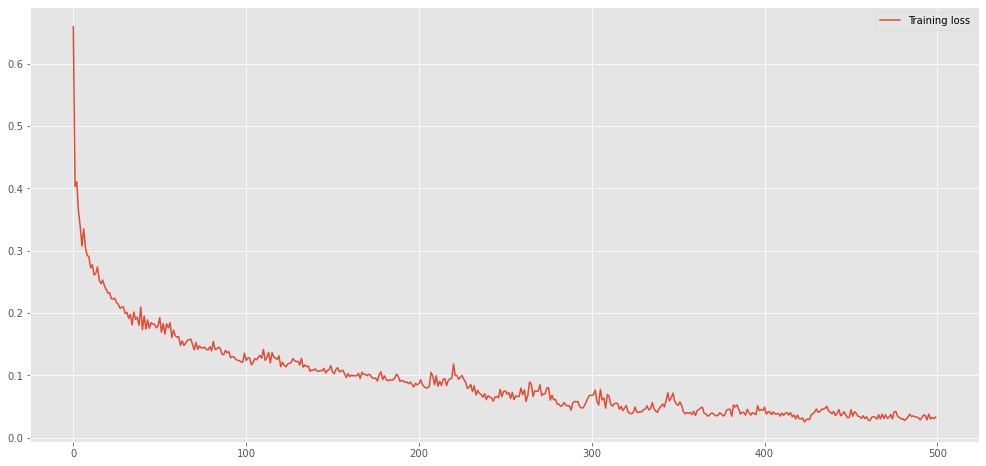

In [70]:
Loss_func = memory_lstm.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [71]:
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 18, 512)           1052672   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 17, 256)           262400    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                139296    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,454,401
Trainable params: 1,454,401
Non-trainable params: 0
_________________________________________________________________


In [72]:
score = lstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh                  #Question: Why is the RNN's performance better than LSTM?!

[0.03162787854671478, 0.0035602767020463943]

<function matplotlib.pyplot.show(close=None, block=None)>

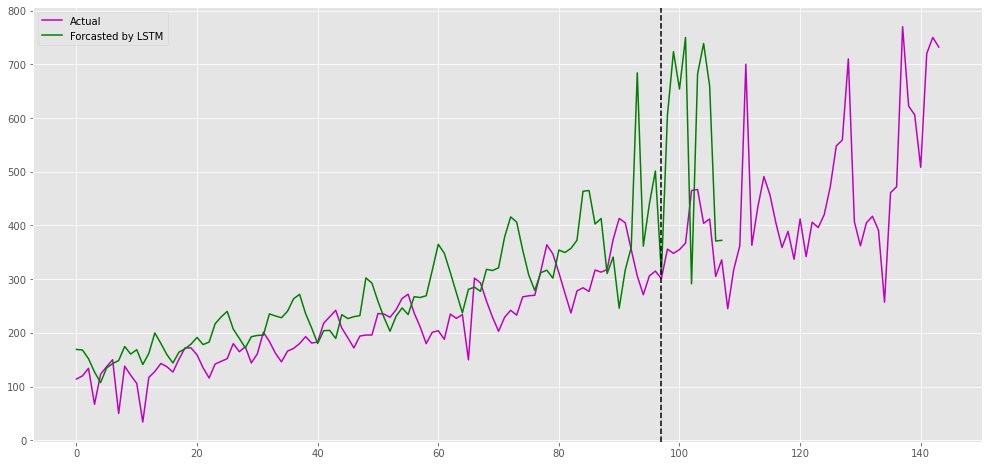

In [73]:
plt.plot(df, color="m")
plt.plot(pred, color="green")
plt.legend(["Actual","Forcasted by LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show #RNN still works better compared with LSTM even with the attention layer! (Why?)

### Bi-LSTM

In [74]:
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(units=512, return_sequences=True, activation ="LeakyReLU")))
bilstm.add(Conv1D(filters=256, kernel_size=2, strides=1, activation="LeakyReLU"))
bilstm.add(Flatten())
bilstm.add(Dense(32, activation="LeakyReLU"))
bilstm.add(Dense(1, activation="LeakyReLU"))
bilstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_bilstm = bilstm.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 3s 232ms/step - loss: 0.6477 - logcosh: 0.2767
Epoch 2/500
2/2 [==============================] - 0s 244ms/step - loss: 0.4527 - logcosh: 0.1618
Epoch 3/500
2/2 [==============================] - 0s 247ms/step - loss: 0.3750 - logcosh: 0.1235
Epoch 4/500
2/2 [==============================] - 1s 250ms/step - loss: 0.3684 - logcosh: 0.1179
Epoch 5/500
2/2 [==============================] - 1s 269ms/step - loss: 0.3162 - logcosh: 0.0903
Epoch 6/500
2/2 [==============================] - 0s 246ms/step - loss: 0.3325 - logcosh: 0.0973
Epoch 7/500
2/2 [==============================] - 1s 263ms/step - loss: 0.3060 - logcosh: 0.0884
Epoch 8/500
2/2 [==============================] - 1s 262ms/step - loss: 0.3074 - logcosh: 0.0908
Epoch 9/500
2/2 [==============================] - 1s 246ms/step - loss: 0.2813 - logcosh: 0.0804
Epoch 10/500
2/2 [==============================] - 1s 251ms/step - loss: 0.2898 - logcosh: 0.0792
Epoch 11/500
2/2 [=

2/2 [==============================] - 1s 318ms/step - loss: 0.1383 - logcosh: 0.0392
Epoch 84/500
2/2 [==============================] - 1s 320ms/step - loss: 0.1365 - logcosh: 0.0381
Epoch 85/500
2/2 [==============================] - 1s 311ms/step - loss: 0.1333 - logcosh: 0.0388
Epoch 86/500
2/2 [==============================] - 1s 312ms/step - loss: 0.1338 - logcosh: 0.0379
Epoch 87/500
2/2 [==============================] - 1s 315ms/step - loss: 0.1392 - logcosh: 0.0377
Epoch 88/500
2/2 [==============================] - 1s 314ms/step - loss: 0.1329 - logcosh: 0.0380
Epoch 89/500
2/2 [==============================] - 1s 312ms/step - loss: 0.1367 - logcosh: 0.0376
Epoch 90/500
2/2 [==============================] - 1s 319ms/step - loss: 0.1331 - logcosh: 0.0367
Epoch 91/500
2/2 [==============================] - 1s 318ms/step - loss: 0.1273 - logcosh: 0.0383
Epoch 92/500
2/2 [==============================] - 1s 318ms/step - loss: 0.1229 - logcosh: 0.0365
Epoch 93/500
2/2 [=====

2/2 [==============================] - 1s 314ms/step - loss: 0.0962 - logcosh: 0.0247
Epoch 166/500
2/2 [==============================] - 1s 320ms/step - loss: 0.1021 - logcosh: 0.0248
Epoch 167/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0939 - logcosh: 0.0240
Epoch 168/500
2/2 [==============================] - 1s 308ms/step - loss: 0.0870 - logcosh: 0.0220
Epoch 169/500
2/2 [==============================] - 1s 314ms/step - loss: 0.0906 - logcosh: 0.0205
Epoch 170/500
2/2 [==============================] - 1s 316ms/step - loss: 0.0911 - logcosh: 0.0222
Epoch 171/500
2/2 [==============================] - 1s 309ms/step - loss: 0.0927 - logcosh: 0.0215
Epoch 172/500
2/2 [==============================] - 1s 302ms/step - loss: 0.0886 - logcosh: 0.0223
Epoch 173/500
2/2 [==============================] - 1s 306ms/step - loss: 0.0831 - logcosh: 0.0199
Epoch 174/500
2/2 [==============================] - 1s 326ms/step - loss: 0.0830 - logcosh: 0.0204
Epoch 175/500


2/2 [==============================] - 1s 327ms/step - loss: 0.0738 - logcosh: 0.0069
Epoch 248/500
2/2 [==============================] - 1s 310ms/step - loss: 0.0671 - logcosh: 0.0058
Epoch 249/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0704 - logcosh: 0.0071
Epoch 250/500
2/2 [==============================] - 1s 317ms/step - loss: 0.0627 - logcosh: 0.0058
Epoch 251/500
2/2 [==============================] - 1s 316ms/step - loss: 0.0671 - logcosh: 0.0059
Epoch 252/500
2/2 [==============================] - 1s 309ms/step - loss: 0.0546 - logcosh: 0.0054
Epoch 253/500
2/2 [==============================] - 1s 309ms/step - loss: 0.0554 - logcosh: 0.0050
Epoch 254/500
2/2 [==============================] - 1s 314ms/step - loss: 0.0672 - logcosh: 0.0057
Epoch 255/500
2/2 [==============================] - 1s 313ms/step - loss: 0.0557 - logcosh: 0.0048
Epoch 256/500
2/2 [==============================] - 1s 327ms/step - loss: 0.0732 - logcosh: 0.0073
Epoch 257/500


2/2 [==============================] - 1s 329ms/step - loss: 0.0373 - logcosh: 0.0036
Epoch 330/500
2/2 [==============================] - 1s 317ms/step - loss: 0.0357 - logcosh: 0.0034
Epoch 331/500
2/2 [==============================] - 1s 328ms/step - loss: 0.0345 - logcosh: 0.0035
Epoch 332/500
2/2 [==============================] - 1s 315ms/step - loss: 0.0279 - logcosh: 0.0031
Epoch 333/500
2/2 [==============================] - 1s 307ms/step - loss: 0.0349 - logcosh: 0.0036
Epoch 334/500
2/2 [==============================] - 1s 315ms/step - loss: 0.0388 - logcosh: 0.0041
Epoch 335/500
2/2 [==============================] - 1s 309ms/step - loss: 0.0410 - logcosh: 0.0039
Epoch 336/500
2/2 [==============================] - 1s 315ms/step - loss: 0.0356 - logcosh: 0.0035
Epoch 337/500
2/2 [==============================] - 1s 311ms/step - loss: 0.0341 - logcosh: 0.0035
Epoch 338/500
2/2 [==============================] - 1s 332ms/step - loss: 0.0448 - logcosh: 0.0042
Epoch 339/500


2/2 [==============================] - 1s 308ms/step - loss: 0.0385 - logcosh: 0.0034
Epoch 412/500
2/2 [==============================] - 1s 313ms/step - loss: 0.0443 - logcosh: 0.0040
Epoch 413/500
2/2 [==============================] - 1s 320ms/step - loss: 0.0390 - logcosh: 0.0036
Epoch 414/500
2/2 [==============================] - 1s 320ms/step - loss: 0.0431 - logcosh: 0.0037
Epoch 415/500
2/2 [==============================] - 1s 311ms/step - loss: 0.0480 - logcosh: 0.0041
Epoch 416/500
2/2 [==============================] - 1s 330ms/step - loss: 0.0407 - logcosh: 0.0035
Epoch 417/500
2/2 [==============================] - 1s 321ms/step - loss: 0.0452 - logcosh: 0.0039
Epoch 418/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0441 - logcosh: 0.0039
Epoch 419/500
2/2 [==============================] - 1s 314ms/step - loss: 0.0425 - logcosh: 0.0038
Epoch 420/500
2/2 [==============================] - 1s 310ms/step - loss: 0.0427 - logcosh: 0.0038
Epoch 421/500


2/2 [==============================] - 1s 308ms/step - loss: 0.0353 - logcosh: 0.0032
Epoch 494/500
2/2 [==============================] - 1s 318ms/step - loss: 0.0416 - logcosh: 0.0037
Epoch 495/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0326 - logcosh: 0.0030
Epoch 496/500
2/2 [==============================] - 1s 318ms/step - loss: 0.0302 - logcosh: 0.0029
Epoch 497/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0357 - logcosh: 0.0032
Epoch 498/500
2/2 [==============================] - 1s 316ms/step - loss: 0.0287 - logcosh: 0.0030
Epoch 499/500
2/2 [==============================] - 1s 312ms/step - loss: 0.0254 - logcosh: 0.0027
Epoch 500/500
2/2 [==============================] - 1s 314ms/step - loss: 0.0316 - logcosh: 0.0030


In [75]:
pred_train = SC.inverse_transform(bilstm.predict(X_train))
pred_test = SC.inverse_transform(bilstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

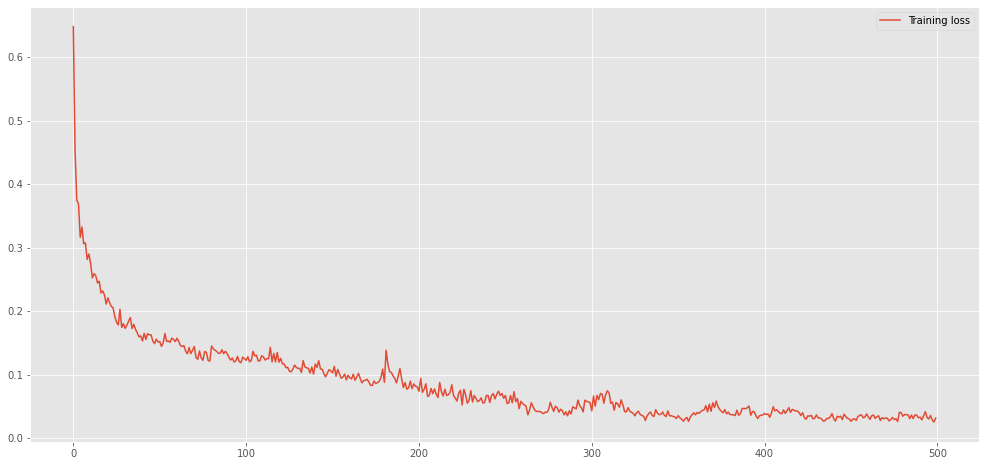

In [76]:
Loss_func = memory_bilstm.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() # People may argue why I have schosen 1000 iterations, but the following diagram is self-descriptive!

In [77]:
bilstm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 18, 1024)          2105344   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 17, 256)           524544    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                139296    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 2,769,217
Trainable params: 2,769,217
Non-trainable params: 0
_________________________________________________________________


In [78]:
score = bilstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.03591733053326607, 0.003421756438910961]

<function matplotlib.pyplot.show(close=None, block=None)>

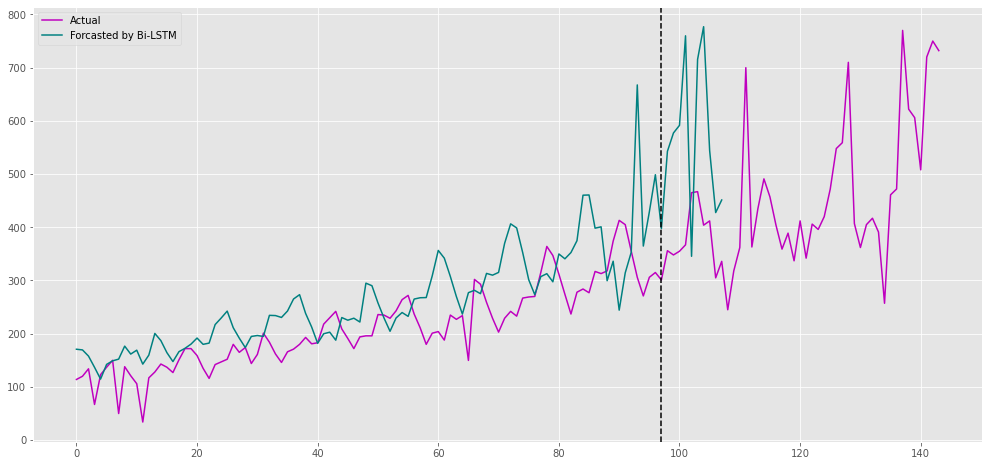

In [79]:
plt.plot(df, color="m")
plt.plot(pred, color="teal")
plt.legend(["Actual","Forcasted by Bi-LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Gated Recurrent Unit (GRU)

In [80]:
gru = Sequential()
gru.add(GRU(units=512, return_sequences=True, activation ="LeakyReLU"))
gru.add(Conv1D(filters=256, kernel_size=2, strides=1, activation="LeakyReLU"))
gru.add(Flatten())
gru.add(Dense(32, activation="LeakyReLU"))
gru.add(Dense(1, activation="LeakyReLU"))
gru.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_gru = gru.fit(X_train, Y_train , epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
2/2 [==============================] - 2s 95ms/step - loss: 0.6380 - logcosh: 0.2695
Epoch 2/500
2/2 [==============================] - 0s 95ms/step - loss: 0.4314 - logcosh: 0.1496
Epoch 3/500
2/2 [==============================] - 0s 96ms/step - loss: 0.3829 - logcosh: 0.1273
Epoch 4/500
2/2 [==============================] - 0s 93ms/step - loss: 0.3753 - logcosh: 0.1248
Epoch 5/500
2/2 [==============================] - 0s 94ms/step - loss: 0.3426 - logcosh: 0.1113
Epoch 6/500
2/2 [==============================] - 0s 93ms/step - loss: 0.2961 - logcosh: 0.0853
Epoch 7/500
2/2 [==============================] - 0s 93ms/step - loss: 0.2992 - logcosh: 0.0812
Epoch 8/500
2/2 [==============================] - 0s 94ms/step - loss: 0.2887 - logcosh: 0.0781
Epoch 9/500
2/2 [==============================] - 0s 94ms/step - loss: 0.2698 - logcosh: 0.0731
Epoch 10/500
2/2 [==============================] - 0s 94ms/step - loss: 0.2715 - logcosh: 0.0732
Epoch 11/500
2/2 [===========

2/2 [==============================] - 0s 117ms/step - loss: 0.1405 - logcosh: 0.0386
Epoch 85/500
2/2 [==============================] - 0s 121ms/step - loss: 0.1264 - logcosh: 0.0376
Epoch 86/500
2/2 [==============================] - 0s 117ms/step - loss: 0.1276 - logcosh: 0.0376
Epoch 87/500
2/2 [==============================] - 0s 121ms/step - loss: 0.1285 - logcosh: 0.0376
Epoch 88/500
2/2 [==============================] - 0s 121ms/step - loss: 0.1369 - logcosh: 0.0401
Epoch 89/500
2/2 [==============================] - 0s 126ms/step - loss: 0.1245 - logcosh: 0.0376
Epoch 90/500
2/2 [==============================] - 0s 119ms/step - loss: 0.1358 - logcosh: 0.0375
Epoch 91/500
2/2 [==============================] - 0s 119ms/step - loss: 0.1395 - logcosh: 0.0384
Epoch 92/500
2/2 [==============================] - 0s 124ms/step - loss: 0.1321 - logcosh: 0.0388
Epoch 93/500
2/2 [==============================] - 0s 117ms/step - loss: 0.1336 - logcosh: 0.0364
Epoch 94/500
2/2 [=====

2/2 [==============================] - 0s 116ms/step - loss: 0.1187 - logcosh: 0.0231
Epoch 167/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0868 - logcosh: 0.0153
Epoch 168/500
2/2 [==============================] - 0s 118ms/step - loss: 0.0944 - logcosh: 0.0168
Epoch 169/500
2/2 [==============================] - 0s 124ms/step - loss: 0.0890 - logcosh: 0.0168
Epoch 170/500
2/2 [==============================] - 0s 120ms/step - loss: 0.0873 - logcosh: 0.0151
Epoch 171/500
2/2 [==============================] - 0s 118ms/step - loss: 0.0775 - logcosh: 0.0150
Epoch 172/500
2/2 [==============================] - 0s 125ms/step - loss: 0.0791 - logcosh: 0.0160
Epoch 173/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0768 - logcosh: 0.0143
Epoch 174/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0890 - logcosh: 0.0161
Epoch 175/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0804 - logcosh: 0.0133
Epoch 176/500


2/2 [==============================] - 0s 118ms/step - loss: 0.0677 - logcosh: 0.0065
Epoch 249/500
2/2 [==============================] - 0s 120ms/step - loss: 0.0654 - logcosh: 0.0065
Epoch 250/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0632 - logcosh: 0.0056
Epoch 251/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0609 - logcosh: 0.0060
Epoch 252/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0565 - logcosh: 0.0053
Epoch 253/500
2/2 [==============================] - 0s 127ms/step - loss: 0.0495 - logcosh: 0.0052
Epoch 254/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0632 - logcosh: 0.0065
Epoch 255/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0598 - logcosh: 0.0059
Epoch 256/500
2/2 [==============================] - 0s 120ms/step - loss: 0.0517 - logcosh: 0.0051
Epoch 257/500
2/2 [==============================] - 0s 128ms/step - loss: 0.0611 - logcosh: 0.0057
Epoch 258/500


2/2 [==============================] - 0s 133ms/step - loss: 0.0496 - logcosh: 0.0044
Epoch 331/500
2/2 [==============================] - 0s 119ms/step - loss: 0.0467 - logcosh: 0.0047
Epoch 332/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0380 - logcosh: 0.0038
Epoch 333/500
2/2 [==============================] - 0s 120ms/step - loss: 0.0482 - logcosh: 0.0049
Epoch 334/500
2/2 [==============================] - 0s 143ms/step - loss: 0.0488 - logcosh: 0.0041
Epoch 335/500
2/2 [==============================] - 0s 120ms/step - loss: 0.0521 - logcosh: 0.0042
Epoch 336/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0423 - logcosh: 0.0039
Epoch 337/500
2/2 [==============================] - 0s 112ms/step - loss: 0.0478 - logcosh: 0.0042
Epoch 338/500
2/2 [==============================] - 0s 130ms/step - loss: 0.0455 - logcosh: 0.0041
Epoch 339/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0609 - logcosh: 0.0048
Epoch 340/500


2/2 [==============================] - 0s 117ms/step - loss: 0.0356 - logcosh: 0.0034
Epoch 413/500
2/2 [==============================] - 0s 112ms/step - loss: 0.0342 - logcosh: 0.0035
Epoch 414/500
2/2 [==============================] - 0s 115ms/step - loss: 0.0415 - logcosh: 0.0039
Epoch 415/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0441 - logcosh: 0.0041
Epoch 416/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0358 - logcosh: 0.0035
Epoch 417/500
2/2 [==============================] - 0s 126ms/step - loss: 0.0416 - logcosh: 0.0038
Epoch 418/500
2/2 [==============================] - 0s 124ms/step - loss: 0.0386 - logcosh: 0.0037
Epoch 419/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0317 - logcosh: 0.0035
Epoch 420/500
2/2 [==============================] - 0s 117ms/step - loss: 0.0347 - logcosh: 0.0031
Epoch 421/500
2/2 [==============================] - 0s 118ms/step - loss: 0.0402 - logcosh: 0.0034
Epoch 422/500


2/2 [==============================] - 0s 125ms/step - loss: 0.0334 - logcosh: 0.0033
Epoch 495/500
2/2 [==============================] - 0s 136ms/step - loss: 0.0311 - logcosh: 0.0033
Epoch 496/500
2/2 [==============================] - 0s 122ms/step - loss: 0.0361 - logcosh: 0.0034
Epoch 497/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0462 - logcosh: 0.0038
Epoch 498/500
2/2 [==============================] - 0s 119ms/step - loss: 0.0403 - logcosh: 0.0036
Epoch 499/500
2/2 [==============================] - 0s 142ms/step - loss: 0.0353 - logcosh: 0.0032
Epoch 500/500
2/2 [==============================] - 0s 125ms/step - loss: 0.0430 - logcosh: 0.0038


In [81]:
pred_train = SC.inverse_transform(gru.predict(X_train))
pred_test = SC.inverse_transform(gru.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

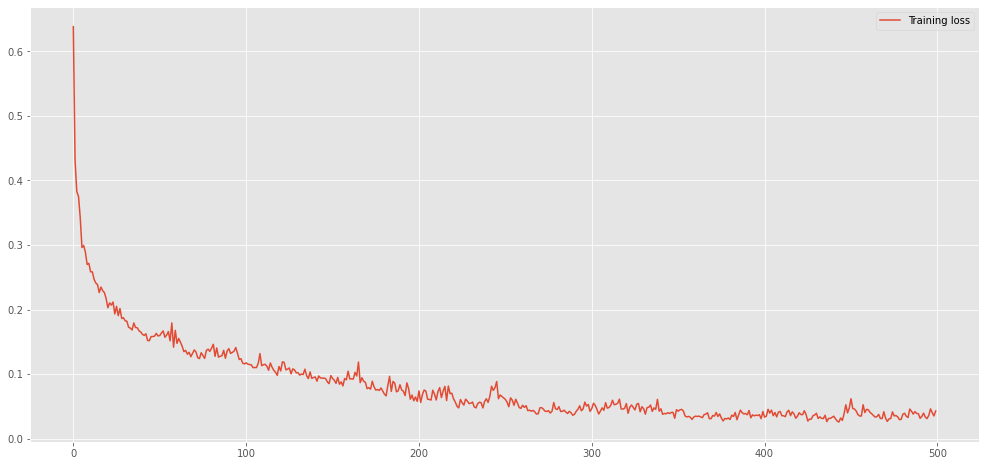

In [82]:
Loss_func = memory_gru.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() 

In [83]:
gru.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 18, 512)           791040    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 17, 256)           262400    
_________________________________________________________________
flatten_8 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                139296    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 1,192,769
Trainable params: 1,192,769
Non-trainable params: 0
_________________________________________________________________


In [84]:
score = gru.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.03846406564116478, 0.003419490298256278]

### <font color='red'> Conclusion: Adding attention previously did not improve the performance of our model; now, adding convolutional did not enhance the performance of our models (it even had a mild negative impact).  </font>

<function matplotlib.pyplot.show(close=None, block=None)>

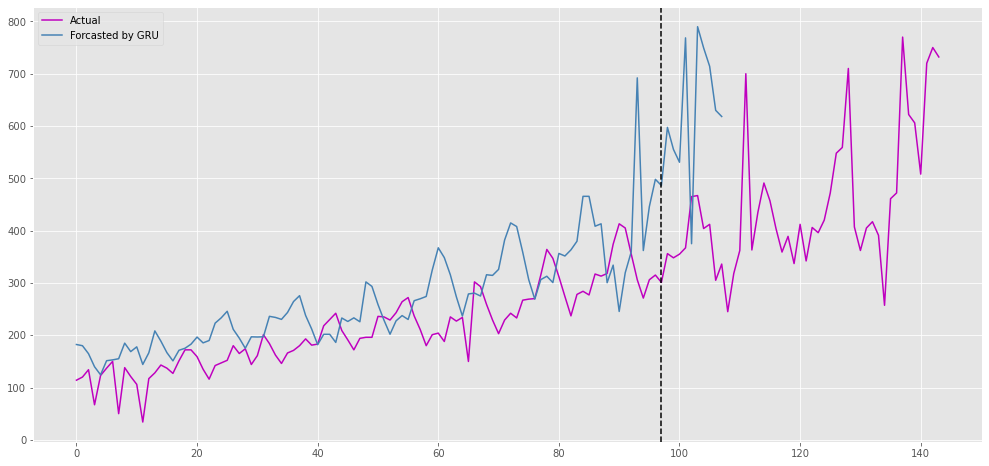

In [85]:
plt.plot(df, color="m")
plt.plot(pred, color="steelblue")
plt.legend(["Actual","Forcasted by GRU"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show